# Features exploration

All features given are numerical (including but not limited to boolean)

In [1]:
import pandas as pd


trainDf = pd.read_csv('train.csv')
trainDf.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'output'],
      dtype='object')

## Numerical data (Not including boolean)

- BMI
- GenHlth
- MentHlth
- PhysHlth
- Age
- Education
- Income

In [2]:
trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,29.447441,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,2.702102,3.617017,5.195954,0.207061,0.447441,8.376041,4.958548,5.852836,0.356010
std,0.499857,0.500009,0.164889,7.080019,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,1.106379,7.997166,9.538762,0.405240,0.497279,2.920253,1.018217,2.131317,0.478866
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [3]:
CONTINUOUS_FEATURES = ["BMI", "Age"]
ORDINAL_FEATURES = ["GenHlth", "MentHlth", "PhysHlth", "Education", "Income"]

BOOLEAN_FEATURES = [
    col
    for col in trainDf.columns
    if col not in CONTINUOUS_FEATURES
    and col not in ORDINAL_FEATURES
    and col != "output"
]

print(f"Number of numerical features: {len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)}")
print(f"Number of boolean features: {len(BOOLEAN_FEATURES)}")

Number of numerical features: 7
Number of boolean features: 14


## Todo

Check outliner of BMI

In [4]:
import numpy as np
from pandas import DataFrame


class Outliner:
    def __init__(self):
        self.fitted = False

    def fit(self, df: DataFrame):
        self.Q1 = df.quantile(0.25)
        self.Q3 = df.quantile(0.75)
        self.IQR = self.Q3 - self.Q1
        self.fitted = True

    def transform(self, df):
        df = df.copy()
        df[((df < (self.Q1 - 1.5 * self.IQR)) | (df > (self.Q3 + 1.5 * self.IQR)))] = (
            np.nan
        )
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

# Normalize data

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


stdScaler = StandardScaler()
trainDf[CONTINUOUS_FEATURES] = stdScaler.fit_transform(trainDf[CONTINUOUS_FEATURES])

minMaxScaler = MinMaxScaler()
trainDf[ORDINAL_FEATURES] = minMaxScaler.fit_transform(trainDf[ORDINAL_FEATURES])

trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,-2.113872e-16,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,0.425526,0.120567,0.173198,0.207061,0.447441,-5.214217e-17,0.791710,0.693262,0.356010
std,0.499857,0.500009,0.164889,1.000099e+00,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,0.276595,0.266572,0.317959,0.405240,0.497279,1.000099e+00,0.203643,0.304474,0.478866
min,0.000000,0.000000,0.000000,-2.182052e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.526073e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,-6.282303e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,-4.712529e-01,0.600000,0.428571,0.000000
50%,1.000000,0.000000,1.000000,-2.044606e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,2.136872e-01,0.800000,0.714286,0.000000
75%,1.000000,1.000000,1.000000,5.018222e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.166667,0.000000,1.000000,5.561573e-01,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,9.683498e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.583567e+00,1.000000,1.000000,1.000000


# Grammatical Evolution

## Import GRAPE

You may need to change this cell based on your platform

In [6]:
# check if GRAPE exists
import os
if not os.path.exists('grape'):
    !git clone https://github.com/UL-BDS/grape.git
    pass

# switch directory to use grape
%cd grape

# import grape and necessary functions
import grape
from algorithms import ge_eaSimpleWithElitism
from functions import pdiv


# switch back to the original directory
%cd -

/home/tu/code-py/evolutionary-computation/mid-project/grape
/home/tu/code-py/evolutionary-computation/mid-project


## Parameters 

In [7]:
import random 


RANDOM_SEED = 1
random.seed(RANDOM_SEED)

POPULATION_SIZE = 1000
MAX_GENERATIONS = 200
P_CROSSOVER = 0.8
P_MUTATION = 0.01
HALLOFFAME_SIZE = max(round(0.01 * POPULATION_SIZE), 1)  # it should be at least 1
ELITE_SIZE = min(round(0.01 * POPULATION_SIZE), HALLOFFAME_SIZE)

CODON_CONSUMPTION = "lazy"
GENOME_REPRESENTATION = "list"
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 17
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 90
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = [
    "gen",
    "invalid",
    "avg",
    "std",
    "min",
    "max",
    "fitness_test",
    "best_ind_length",
    "avg_length",
    "best_ind_nodes",
    "avg_nodes",
    "best_ind_depth",
    "avg_depth",
    "avg_used_codons",
    "best_ind_used_codons",
    "selection_time",
    "generation_time",
]

## Gramma

In [8]:
grammar = grape.Grammar("./gramma.bnf")
grammar.production_rules

[[['add(<number_value>, <number_value>)', 'non-terminal', 2, 0, True, 3],
  ['sub(<number_value>, <number_value>)', 'non-terminal', 2, 1, True, 3],
  ['mul(<number_value>, <number_value>)', 'non-terminal', 2, 2, True, 3],
  ['div(<number_value>, <number_value>)', 'non-terminal', 2, 3, True, 3],
  ['abs(<number_value>)', 'non-terminal', 1, 4, True, 3],
  ['sigmoid(<number_value>)', 'non-terminal', 1, 5, True, 3],
  ['tanh(<number_value>)', 'non-terminal', 1, 6, True, 3],
  ['relu(<number_value>)', 'non-terminal', 1, 7, True, 3],
  ['swish(<number_value>)', 'non-terminal', 1, 8, True, 3],
  ['np.where((<logic_op>), (<number_value>), (<number_value>))',
   'non-terminal',
   3,
   9,
   True,
   3]],
 [['<compare_op>', 'non-terminal', 1, 0, True, 4],
  ['and_(<logic_op>, <logic_op>)', 'non-terminal', 2, 1, True, 3],
  ['or_(<logic_op>, <logic_op>)', 'non-terminal', 2, 2, True, 3],
  ['xor(<logic_op>, <logic_op>)', 'non-terminal', 2, 3, True, 3],
  ['not_(<logic_op>)', 'non-terminal', 1, 4

## Fitness function 

### Predict fitness

In [ ]:
import numpy as np


# logic op
def and_(a, b):
    return np.logical_and(a, b)
def or_(a, b):
    return np.logical_or(a, b)
def xor(a, b):
    return np.logical_xor(a, b)
def not_(a):
    return np.logical_not(a)

# compare op
def greater_than(a, b):
    return (a > b)
def less_than(a, b):
    return (a < b)
def in_range(a, b, c):
    return np.logical_and(a > b, a < c)

# number op
def add(a, b):
    return (a + b)
def sub(a, b):
    return (a - b)
def mul(a, b):
    return (a * b)
def div(a, b):
    return pdiv(a, b)
def abs(a):
    return np.abs(a)
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
def tanh(a):
    return np.tanh(a)
def relu(a):
    return np.maximum(0, a)
def swish(a):
    return a * sigmoid(a)


class GE_ExecuteError(Exception):
    # take a message as input
    def __init__(self, message="Error during the execution of the individual"):
        self.message = message
        super().__init__(self.message)
    pass

def gePredictProba(individual, nf, bf, training=False):
    """Predict if a case is positive or negative using ge and the individual.

    Args:
        individual (_type_): a valid GE individual
        nf (_type_): numerical features
        bf (_type_): boolean features

    Raises:
        GE_ExecuteError: if error happens during the execution of the individual

    Returns:
        float: the probability of the case being positive [0, 1]
    """

    nf = np.array(nf)
    bf = np.array(bf)

    assert nf.ndim == bf.ndim, "Numerical and Boolean data must have the same number of dimensions"

    # execute
    try:
        if nf.ndim == 1:
            res = eval(individual.phenotype)
            pred = 1 if res > 0 else 0
            return pred

        if nf.ndim == 2:
            assert nf.shape[0] == bf.shape[0], "Numerical and Boolean data must have the same number of samples"

            nf = nf.T
            bf = bf.T

            proba = eval(individual.phenotype)

            # scale the output to [-700, 700] to protect the sigmoid function
            if training:
                pos_mask = proba > 0
                neg_mask = ~pos_mask

                probaScaled = np.zeros_like(proba)
                if len(set(proba[pos_mask])) >= 2:
                    pos_max = proba[pos_mask].max()
                    pos_scaled = proba[pos_mask] / pos_max * 700
                    probaScaled[pos_mask] = pos_scaled
                if len(set(proba[neg_mask])) >= 2:
                    neg_min = proba[neg_mask].min()
                    neg_scaled = proba[neg_mask] / neg_min * -700
                    probaScaled[neg_mask] = neg_scaled

            proba = sigmoid(probaScaled)
            return proba

        raise NotImplementedError("Data with more than 2 dimensions is not supported")

    except (
        FloatingPointError,
        ZeroDivisionError,
        OverflowError,
        MemoryError,
        IndexError,
        TypeError,
    ) as e:
        raise GE_ExecuteError(str(e))

def gePredict(individual, nf, bf):
    proba = gePredictProba(individual, nf, bf)
    return np.round(proba).astype(int)


def errorRateFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    proba = gePredictProba(individual, nf, bf, training=True)

    # mse = np.mean((Y - proba) ** 2)

    bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))

    return bce

### Number of features used fitness

In [10]:
def featUsedFitness(individual, x):
    L = 1
    k = 0.7

    totalFeat: int = x.shape[1]
    x0 = totalFeat // 2

    featUsed = 0
    for i in range(len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)):
        if f"nf[{i}]" in individual.phenotype:
            featUsed += 1
    for i in range(len(BOOLEAN_FEATURES)):
        if f"bf[{i}]" in individual.phenotype:
            featUsed += 1

    if featUsed <= x0:
        return L * featUsed / (2 * x0)

    return L / (1 + np.exp(-k * (featUsed - x0)))


def accuracyFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    pred = gePredict(individual, nf, bf)

    acc = np.mean(Y == pred)

    return acc

### Combined fitness

In [11]:

def fitness(individual, points):
    FITNESS_SIZE = 2
    
    INVALID = tuple([np.nan] * FITNESS_SIZE)

    if individual.invalid:
        return INVALID

    x, Y = points

    # features used
    featFitness = featUsedFitness(individual, x)

    # error rate (mse)
    try:
        errRate = errorRateFitness(individual, x, Y)
    except GE_ExecuteError:
        return INVALID

    # accuracy = accuracyFitness(individual, x, Y)
    
    # activation regularization
    

    return (errRate, featFitness)

## Train

### Toolbox

In [12]:
from deap import creator, base, tools


MSE_WEIGHT = -1  # minimize
ACCURACY_WEIGHT = 2  # maximize
FEAT_USED_WEIGHT = 0.05  # maximize


toolbox = base.Toolbox()

creator.create("Fitness", base.Fitness, weights=(
    # abs(MSE_WEIGHT) + abs(ACCURACY_WEIGHT) + abs(FEAT_USED_WEIGHT), 
    MSE_WEIGHT, 
    # ACCURACY_WEIGHT, 
    FEAT_USED_WEIGHT
))
creator.create("Individual", grape.Individual, fitness=creator.Fitness)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)
toolbox.register("evaluate", fitness)
toolbox.register("select", tools.selTournament, tournsize=7)  # nsga2
toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

### Data

In [13]:
# train data
X_train = trainDf.drop(columns=["output"])
y_train = trainDf["output"].to_numpy()



In [14]:
# population and hall of fame:
population = toolbox.populationCreator(
    pop_size=POPULATION_SIZE,
    bnf_grammar=grammar,
    min_init_depth=MIN_INIT_TREE_DEPTH,
    max_init_depth=MAX_INIT_TREE_DEPTH,
    codon_size=CODON_SIZE,
    codon_consumption=CODON_CONSUMPTION,
    genome_representation=GENOME_REPRESENTATION,
)
hof = tools.HallOfFame(HALLOFFAME_SIZE)

# prepare the statistics object:
stats_err_rate = tools.Statistics(lambda ind: ind.fitness.values[0])
stats_feat_used = tools.Statistics(lambda ind: ind.fitness.values[1])

stats = tools.MultiStatistics(errRate=stats_err_rate, featUsed=stats_feat_used)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# run the algorithm:
population, logbook = ge_eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    elite_size=ELITE_SIZE,
    bnf_grammar=grammar,
    codon_size=CODON_SIZE,
    max_tree_depth=MAX_TREE_DEPTH,
    max_genome_length=MAX_GENOME_LENGTH,
    points_train=[X_train, y_train],
    codon_consumption=CODON_CONSUMPTION,
    report_items=REPORT_ITEMS,
    genome_representation=GENOME_REPRESENTATION,
    stats=stats,
    halloffame=hof,
    verbose=False,
)

/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 0 , Best fitness = (np.float64(0.6931471805599454), 0.0)


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: Runtim

gen = 1 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 115


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 2 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 103


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 3 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 92


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 4 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 94


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 5 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 70


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 6 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 74


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 7 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 73


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 8 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 47


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 9 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 39


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 10 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 48


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 11 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 51


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 12 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 55


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 13 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 45


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 14 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 15 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 16 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 51


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 17 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 39


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 18 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 19 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 48


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 20 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 21 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 22 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 53


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 23 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 24 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 25 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 37


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 26 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 27 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 40


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 28 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 29 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 40


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 30 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 41


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: Runti

gen = 31 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 32 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 33 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 34 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 35 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 36 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 37 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 38 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 39 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 35


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 40 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: Runti

gen = 41 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 40


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 42 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 43 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 44 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 45 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 46 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 47 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 37


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 48 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 49 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 50 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 51 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 35


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: Runtim

gen = 52 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 53 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 54 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 55 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 56 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 57 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 58 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 59 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 60 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 61 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 62 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 63 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 64 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 65 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 39


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 66 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 67 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 35


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 68 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 69 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 70 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 71 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 40


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 72 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 73 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 74 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 17


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 75 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 76 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 16


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 77 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 78 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 79 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 80 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 38


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 81 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 39


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 82 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 35


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 83 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 84 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 42


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 85 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 37


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 86 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 40


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 87 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 88 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 35


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 89 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce 

gen = 90 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 91 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 92 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 93 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 94 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 95 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 38


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 96 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 97 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 98 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 40


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 99 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 100 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -n

gen = 101 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 102 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 103 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 104 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 105 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 106 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 107 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 108 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 109 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 110 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 111 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 112 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 113 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 114 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 115 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 116 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 117 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 118 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 19


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 119 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 120 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg

gen = 121 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: Runti

gen = 122 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 19


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 123 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 21


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 124 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 19


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 125 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 20


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 126 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 127 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -n

gen = 128 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 19


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: Runtim

gen = 129 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 130 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 131 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 132 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 133 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 134 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 135 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 136 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 137 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 138 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 139 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -n

gen = 140 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 141 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 142 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 143 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 144 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 21


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 145 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:98: RuntimeWarning: invalid value encountered in cast
  probaScaled[neg_mask] = neg_scaled
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np

gen = 146 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: Runtim

gen = 147 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 148 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 37


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 149 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 150 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 20


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: Runti

gen = 151 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 152 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 153 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 19


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 154 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 155 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 156 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 157 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 158 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 159 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 160 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 34


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 161 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 162 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 163 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 164 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: Runtim

gen = 165 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 17


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 166 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: Runti

gen = 167 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 30


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 168 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 20


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 169 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 170 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 171 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 172 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 173 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 174 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 175 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 176 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 177 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 178 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 20


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 179 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 180 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 181 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 182 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 183 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 28


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 184 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 23


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 185 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: Runtim

gen = 186 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 22


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 187 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 24


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 188 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 189 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 190 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 37


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 191 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 33


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 192 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 32


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 193 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 31


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 194 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 29


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: Runti

gen = 195 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 26


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 196 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 25


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 197 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid va

gen = 198 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 36


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

gen = 199 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 27


/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered 

gen = 200 , Best fitness = (np.float64(0.6931471805599454), 0.0) , Number of invalids = 18


/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in divide
  neg_scaled = proba[neg_mask] / neg_min * -700
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: divide by zero encountered in log
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:128: RuntimeWarning: invalid value encountered in multiply
  bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))
/tmp/ipykernel_306159/1682503680.py:97: RuntimeWarning: invalid value encountered in

### Visualization

#### Error Rate

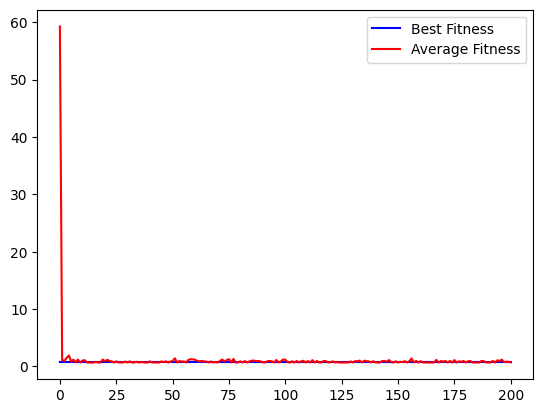

In [15]:
from matplotlib import pyplot as plt

chapter_fitness = logbook.chapters["errRate"]

gen = chapter_fitness.select("gen")
fit_mins = chapter_fitness.select("min")
fit_avgs = chapter_fitness.select("avg")

plt.plot(gen, fit_mins, "b-", label="Best Fitness")
plt.plot(gen, fit_avgs, "r-", label="Average Fitness")
plt.legend()

#### Number of Features used

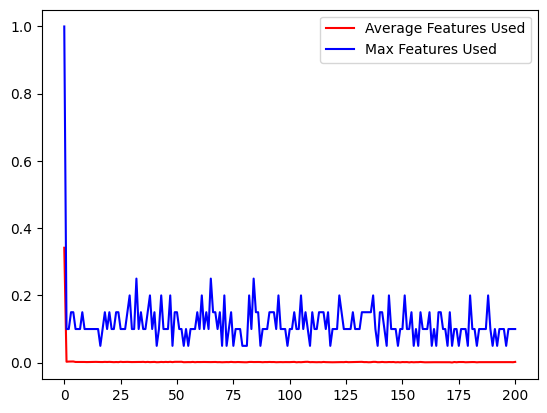

In [16]:
chapter_feat = logbook.chapters["featUsed"]

gen = chapter_feat.select("gen")
feat_avgs = chapter_feat.select("avg")
feat_maxs = chapter_feat.select("max")

plt.plot(gen, feat_avgs, "r-", label="Average Features Used")
plt.plot(gen, feat_maxs, "b-", label="Max Features Used")
plt.legend()

## Best Individual

In [17]:
import textwrap

best = hof.items[0].phenotype
print("Best individual: \n", "\n".join(textwrap.wrap(best, 80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values)

Best individual: 
 mul(8.8436, swish(-4.8668))

Training Fitness:  (np.float64(0.6931471805599454), 0.0)


In [18]:
trainAcc = accuracyFitness(hof.items[0], X_train, y_train)
trainAcc

UnboundLocalError: local variable 'probaScaled' referenced before assignment

In [ ]:
with open("best_individual.txt", "w+") as f:
    print(best, file=f)
    print("\nTraining Fitness: ", hof.items[0].fitness.values, file=f)

### Predict

In [ ]:
# test data 
testDf = pd.read_csv('test.csv')
testDf[CONTINUOUS_FEATURES] = stdScaler.transform(testDf[CONTINUOUS_FEATURES])
testDf[ORDINAL_FEATURES] = minMaxScaler.transform(testDf[ORDINAL_FEATURES])

X_test = testDf

nf = X_test[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
bf = X_test[BOOLEAN_FEATURES].to_numpy()

res: list = gePredict(hof.items[0], nf, bf) # type: ignore

In [ ]:
# make df of index, output; index [0...n-1]; output is above

outputDf = pd.DataFrame(res, columns=["output"])
outputDf["index"] = outputDf.index

outputDf = outputDf[["index", "output"]]

outputDf.to_csv("submission.csv", index=False)

outputDf

,index,output
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
95799,95799,0
95800,95800,0
95801,95801,0
95802,95802,1
